# Trabalho 1 - Fundamentos de Sistemas Inteligentes (João Pedro Assis - 17/0146367)

O trabalho consiste em avaliar os dados presentes no dataset de doenças cardíacas na África do Sul. Utilizaremos as técnicas de Árvoces de Decisão e Florestas Aleatórias para prever se um indivíduo possui ou não doença cardíaca com base em 462 amostras com 10 variáveis.



## Primeiramente, faremos o import das bibliotecas

In [25]:
# Mathematical imports

import numpy as np
import pandas as pd

# Sklearn imports

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Plot library

import matplotlib.pyplot as plt

SEED = 165


## Carregando o dataset

Iremos ler o arquivo `data.csv` para que possamos analisar a sua estrutura. Após isso iremos realizar operações de limpeza no dataset.

In [6]:
dataframe = pd.read_csv('./data.csv')

dataframe.famhist.replace({"Present": 1, "Absent": 0}, inplace=True)

del dataframe['id']

actual_variables = dataframe.drop('chd', axis=1)

## Item 1 - Análise estatística básica

Agora que importamos o dataset e removemos/modificamos as colunas problemáticas, poderemos extrair análises estatísticas importantes sobre o conjunto de dados.

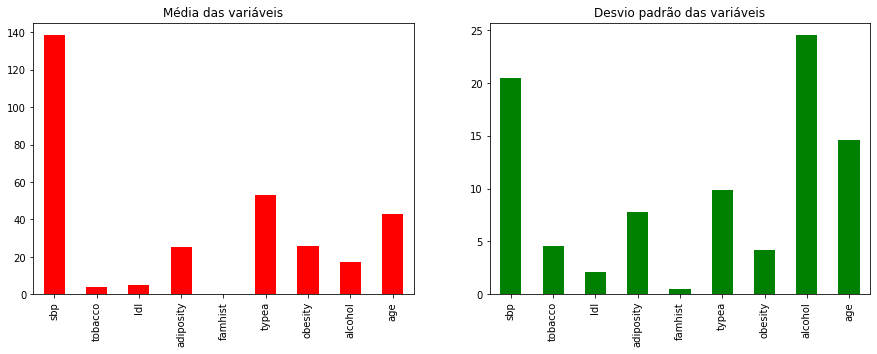

In [16]:
description = actual_variables.describe()
var_mean = description.T['mean']
var_std = description.T['std']

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1 = var_mean.plot.bar(title='Média das variáveis', color='red', ax=ax1)
ax2 = var_std.plot.bar(title='Desvio padrão das variáveis', color='green', ax=ax2)

plt.show()

## Item 2 - Construindo um modelo de Árvore de decisão para avaliar os dados

Iremos construir um modelo de Árvoce de decisão e avaliá-lo usando o método da cross validation para produzir os resultados

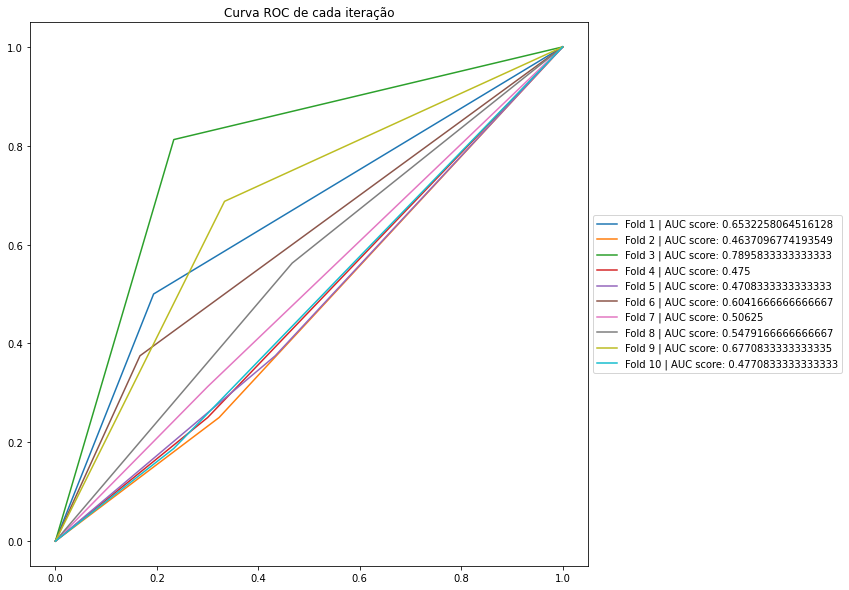

In [31]:
plt.figure(figsize=(10, 10))

features = actual_variables.keys()
X = actual_variables.values
Y = dataframe['chd'].values

skf = StratifiedKFold(n_splits=10)
clf = DecisionTreeClassifier()

labels = []
scores = []
c_matrixes = []

folds = 1
for idx_train, idx_test in skf.split(X, Y):

    train_x, train_y, test_x, test_y = X[idx_train], Y[idx_train], X[idx_test], Y[idx_test]

    clf.fit(train_x, train_y)

    predicted_y = clf.predict(test_x)
    predicted_y_prob = clf.predict_proba(test_x)[:, 1]

    c_matrixes.append(confusion_matrix(test_y, predicted_y))

    tmp_score = roc_auc_score(test_y, predicted_y_prob)
    labels.append(f'Fold {folds} | AUC score: {tmp_score}')

    fpr, tpr, _ = roc_curve(test_y, predicted_y_prob)
    plt.plot(fpr, tpr)
    folds += 1

plt.title('Curva ROC de cada iteração')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Podemos printar o score médio obtido

In [ ]:
mean_score = np.mean(scores)
print(f'A média do auc score usando o DecisionTreeClassifier é de: {mean_score}')

## Adquirindo a matriz de confusão

Após plotar a curva ROC para cada iteração do cross validation, iremos plotar a matriz de confusão, para que possamos ter uma melhor ideia do comportamento do classificador

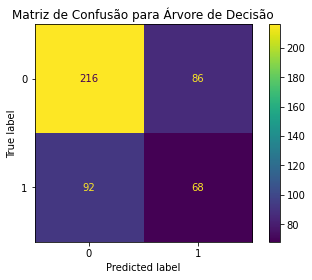

In [24]:
c_matrix_condensed = np.add.reduce(c_matrixes)
cm = ConfusionMatrixDisplay(confusion_matrix=c_matrix_condensed)

cm.plot()
plt.title("Matriz de Confusão para Árvore de Decisão")
plt.show()

## Item 3 - Construindo um modelo de Floresta Randômica com 100 árvores

Agora que já verificamos as capacidades da Árvore de Decisão, poderemos avançar para modelos mais complexos. Iremos utilizar o `RandomForestClassifier` para classificar o dataset

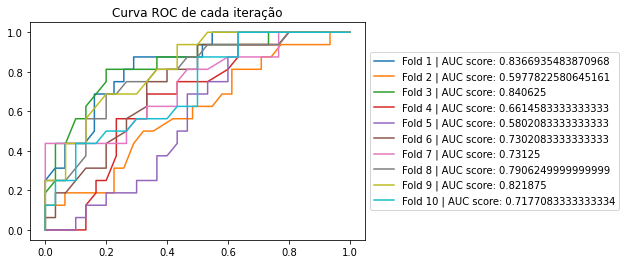

In [33]:
features_forest = RandomForestClassifier(n_estimators=100, max_features=None, random_state=SEED)

labels = []
scores = []
c_matrixes = []

folds = 1
for idx_train, idx_test in skf.split(X, Y):

    train_x, train_y, test_x, test_y = X[idx_train], Y[idx_train], X[idx_test], Y[idx_test]

    features_forest.fit(train_x, train_y)

    predicted_y = features_forest.predict(test_x)
    predicted_y_prob = features_forest.predict_proba(test_x)[:, 1]

    c_matrixes.append(confusion_matrix(test_y, predicted_y))

    tmp_score = roc_auc_score(test_y, predicted_y_prob)
    labels.append(f'Fold {folds} | AUC score: {tmp_score}')

    fpr, tpr, _ = roc_curve(test_y, predicted_y_prob)
    plt.plot(fpr, tpr)
    folds += 1

plt.title('Curva ROC de cada iteração')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plot da matriz de confusão da Floresta Randômica



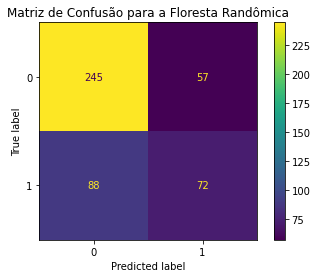

In [34]:
c_matrix_condensed = np.add.reduce(c_matrixes)
cm = ConfusionMatrixDisplay(confusion_matrix=c_matrix_condensed)

cm.plot()
plt.title("Matriz de Confusão para a Floresta Randômica")
plt.show()

## Item 4 - Construindo um modelo de Floresta Randômica com 100 árvores

Agora que já verificamos as capacidades das Florestas Randômicas, iremos fazer uma pequena modificação, que consiste em usar a raiz quadrada das features.

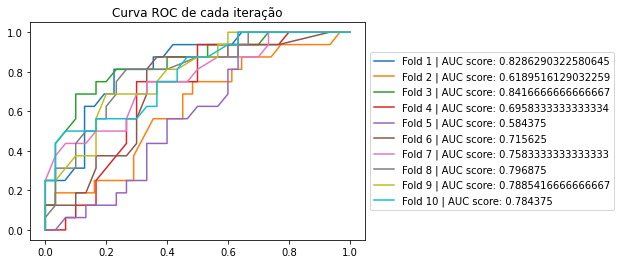

In [39]:
features_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=SEED)

labels = []
scores = []
c_matrixes = []
most_important_features = []

folds = 1
for idx_train, idx_test in skf.split(X, Y):

    train_x, train_y, test_x, test_y = X[idx_train], Y[idx_train], X[idx_test], Y[idx_test]

    features_forest.fit(train_x, train_y)

    predicted_y = features_forest.predict(test_x)
    predicted_y_prob = features_forest.predict_proba(test_x)[:, 1]

    c_matrixes.append(confusion_matrix(test_y, predicted_y))

    tmp_score = roc_auc_score(test_y, predicted_y_prob)
    labels.append(f'Fold {folds} | AUC score: {tmp_score}')

    fpr, tpr, _ = roc_curve(test_y, predicted_y_prob)
    plt.plot(fpr, tpr)

    most_important_features.append(clf.feature_importances_)

    folds += 1

condensed_best_features = np.mean(most_important_features, axis=0)

plt.title('Curva ROC de cada iteração')
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Plot da matriz de confusão das Florestas Aleatórias com raiz quadrada das features

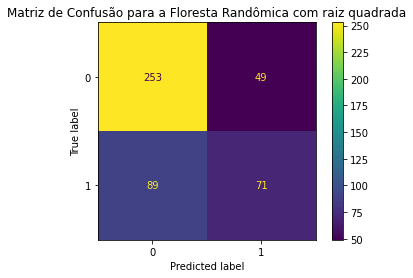

In [36]:
c_matrix_condensed = np.add.reduce(c_matrixes)
cm = ConfusionMatrixDisplay(confusion_matrix=c_matrix_condensed)

cm.plot()
plt.title("Matriz de Confusão para a Floresta Randômica com raiz quadrada")
plt.show()

## Item 5 - Features mais relevantes

Após rodar os 3 modelos, foi constatado que o modelo de Floresta Randômica com raiz quadrada foi o que melhor performou. Com base nisso os parâmetros de importância de features foram coletados.

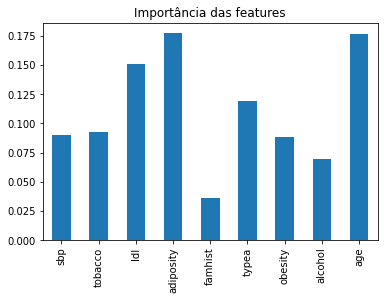

In [42]:
best_features = pd.Series(condensed_best_features, features)
best_features.plot.bar()
plt.title('Importância das features')
plt.show()
